Het doel van deze notebook is om een data gesubstantieerd antwoord op de casus te kunnen geven. Het plan is om dit te doen aan de hand van een Multi-Criteria Decision Analysis (MCDA) Weighted Sum Model (WSM), waar er meerdere indicatoren worden ontwikkeld die verschillende aspecten van de vergelijking representeren (betaalbaarheid, faciliteiten in de buurt, toegang tot natuur, etc.) en met individuele wegingen een 'geschiktheidsscore' vormen. Omdat een WSM afhangt van wegingen bij voorkeur bepaald door domeinexperts of gebaseerd op doelgroepsvoorkeuren, zal ik meerdere opties simuleren.

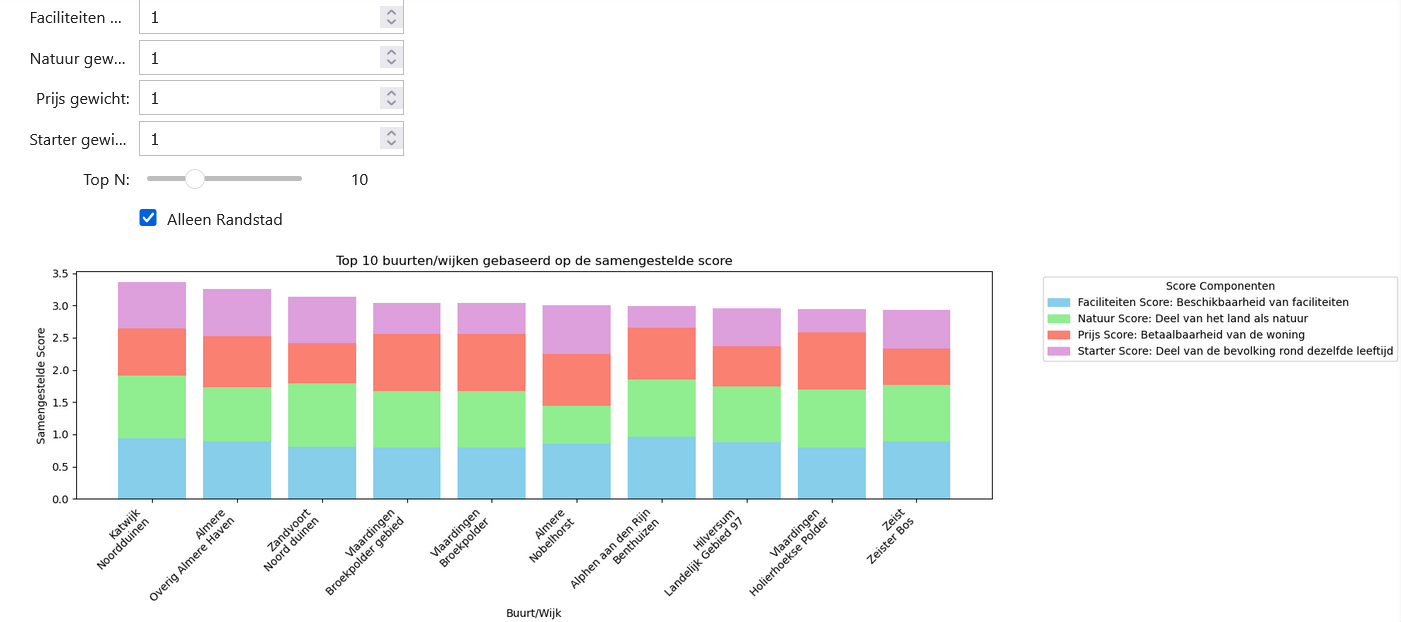

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import ipywidgets as widgets
from ipywidgets import interactive
from matplotlib.patches import Patch
import seaborn as sns

# Laad Data

In [2]:
df1 = pd.read_csv("data/data_1.csv")
df2 = pd.read_csv("data/data_2.csv")

df3 = pd.read_csv("data/Bodemgebruik__wijk__en_buurtcijfers_2017_02052025_150059.csv",
                  sep=';')  # voor een betere 'groen' indicator

In [3]:
df1

,Unnamed: 0.1,Unnamed: 0,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,...,Hoekwoning_50,TweeOnderEenKapWoning_51,VrijstaandeWoning_52,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,TotaleOppervlakte_4,BouwgrondOpp
0,0,0,0,Nederland,Nederland,Land,NL00,17081507,8475102,8606405,...,3100.0,3430.0,4040.0,1.0,0.9,0.8,0.7,11.2,4154302,434426
1,1,1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,25286,12603,12683,...,2640.0,3090.0,3700.0,2.5,2.3,1.1,1.2,1.8,27887,5992
2,2,2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,3545,1710,1835,...,2860.0,3300.0,3810.0,1.0,0.9,0.5,0.8,2.4,1478,53
3,3,3,3,Annen,Aa en Hunze,Buurt,BU16800000,3395,1635,1760,...,2860.0,3300.0,3720.0,0.9,0.8,0.5,0.7,2.5,252,3
4,4,4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,150,80,75,...,NaN,NaN,4830.0,2.7,2.1,1.7,2.1,1.2,1226,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,16662,16662,16662,Gerenbroek,Zwolle,Buurt,BU01935150,3165,1555,1610,...,2990.0,3470.0,4020.0,0.9,0.7,0.5,0.6,11.7,49,0
16663,16663,16663,16663,Oude Mars,Zwolle,Buurt,BU01935160,90,45,45,...,NaN,NaN,5910.0,1.5,1.6,1.6,1.6,8.9,45,0
16664,16664,16664,16664,Wijk 52 Soestweteringlanden,Zwolle,Wijk,WK019352,900,445,450,...,2850.0,3700.0,3840.0,3.9,4.0,1.1,1.1,2.9,1194,134
16665,16665,16665,16665,Windesheim,Zwolle,Buurt,BU01935200,400,190,205,...,2830.0,3390.0,3750.0,4.8,4.9,0.4,0.4,1.0,53,0


In [4]:
df2

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
0,0,Nederland,307978.0,29900.0,22.0
1,1,Noord-Nederland (LD),230412.0,22700.0,20.0
2,2,Oost-Nederland (LD),281575.0,27900.0,21.0
3,3,West-Nederland (LD),344342.0,33100.0,22.0
4,4,Zuid-Nederland (LD),290853.0,28800.0,22.0
...,...,...,...,...,...
379,379,Castricum,369741.0,34600.0,21.0
380,380,Goeree-Overflakkee,274637.0,27100.0,16.0
381,381,Tynaarlo,309779.0,30000.0,13.0
382,382,'s-Gravenhage gemeente,324838.0,32200.0,21.0


In [5]:
df3

,Wijken en buurten,Regioaanduiding/Gemeentenaam (naam),Regioaanduiding/Soort regio (omschrijving),Regioaanduiding/Codering (code),Totale oppervlakte (ha),Recreatieterrein/Totaal recreatieterrein (ha),Recreatieterrein/Park en plantsoen (ha),Recreatieterrein/Sportterrein (ha),Recreatieterrein/Volkstuin (ha),Recreatieterrein/Dagrecreatief terrein (ha),...,Binnenwater/Spaarbekken (ha),Binnenwater/Recreatief binnenwater (ha),Binnenwater/Binnenwater voor delfstofwinning (ha),Binnenwater/Vloei- en/of slibveld (ha),Binnenwater/Overig binnenwater (ha),Buitenwater/Totaal buitenwater (ha),"Buitenwater/Waddenzee, Eems, Dollard (ha)",Buitenwater/Oosterschelde (ha),Buitenwater/Westerschelde (ha),Buitenwater/Noordzee (ha)
0,Nederland,Nederland,Land,NL00,4154302,108335,32863,36288,3608,11526,...,1240,11104,2976,484,110008,415211,254432,34578,29812,96389
1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,27887,569,29,162,6,9,...,0,71,25,4,180,0,0,0,0,0
2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1478,23,5,11,0,0,...,0,0,0,0,13,0,0,0,0,0
3,Annen,Aa en Hunze,Buurt,BU16800000,252,13,5,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1226,10,0,3,0,0,...,0,0,0,0,13,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,Gerenbroek,Zwolle,Buurt,BU01935150,49,2,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
16850,Oude Mars,Zwolle,Buurt,BU01935160,45,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
16851,Wijk 52 Soestweteringlanden,Zwolle,Wijk,WK019352,1194,9,2,5,0,0,...,0,0,0,0,64,0,0,0,0,0
16852,Windesheim,Zwolle,Buurt,BU01935200,53,3,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning/Prep & EDA

In [6]:
df1.duplicated(subset=df1.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "ID"]).columns).value_counts()  # geen duplicaten

False    16667
Name: count, dtype: int64

In [7]:
df2.duplicated(subset=df2.drop(columns=['Unnamed: 0']).columns.tolist()).value_counts()  # 10 duplicaten

False    374
True      10
Name: count, dtype: int64

In [8]:
df2[df2["RegioS"].isin(df2['RegioS'].value_counts()[df2['RegioS'].value_counts() >= 2].index.tolist())].sort_values(
    "RegioS")

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
126,126,'s-Gravenhage gemeente,324838.0,32200.0,21.0
382,382,'s-Gravenhage gemeente,324838.0,32200.0,21.0
33,33,Apeldoorn,287155.0,29500.0,22.0
374,374,Apeldoorn,287155.0,29500.0,22.0
57,57,Bladel,334264.0,32300.0,19.0
377,377,Bladel,334264.0,32300.0,19.0
76,76,Castricum,369741.0,34600.0,21.0
379,379,Castricum,369741.0,34600.0,21.0
119,119,Goeree-Overflakkee,274637.0,27100.0,16.0
380,380,Goeree-Overflakkee,274637.0,27100.0,16.0


Omdat de duplicaten niet altijd dezelfde gegevens bevatten houd ik de rij met de minste NaN waardes.

In [9]:
df2["nan_count"] = df2.isna().sum(axis=1)  # tel nans

In [10]:
df2 = df2.sort_values(by="nan_count", ascending=True).drop_duplicates(subset='RegioS', keep='first')

In [11]:
df1['Gemeentenaam_1'].iloc[0]  # sommige velden hebben extra spaties

'Nederland                               '

In [12]:
strip_targets = [
    (df1, ['Gemeentenaam_1', 'SoortRegio_2']),
    (df3, [
        'Regioaanduiding/Gemeentenaam (naam)',
        'Regioaanduiding/Soort regio (omschrijving)'
    ])
]

for df, columns in strip_targets:
    for col in columns:
        df[col] = df[col].str.strip()

Er is helaas alleen maar toegang tot data op gemeenteniveau in df2. Ik join df2 daarom bij df1 op gemeente, i.p.v. wijk/buurt. Ik doe voor nu een left join zodat ik alle data uit df1 behoud. NaN rijen kunnen later weggegooid worden.

In [13]:
df_merged = df1.merge(df2, how='left', left_on='Gemeentenaam_1', right_on='RegioS')
df_merged.shape

(16667, 47)

Ik kijk alleen maar naar wijken en buurten, en niet naar gemeentes, als mogelijke locaties om een wijk bij te bouwen. Gemeentes zijn te groot wat ervoor zorgt dat sommige variabelen hun waarden verliezen (de variabelen over faciliteiten bijvoorbeeld). Er zijn sommige buurten met genoeg vrije plek om een wijk bij te bouwen.

In [14]:
df_merged = df_merged[df_merged['SoortRegio_2'].isin(['Wijk', 'Buurt'])]

Er zijn ook wat 'nep' buurten/wijken die verzamelingen van verspreide huizen zijn. Deze worden ook verwijderd.

In [15]:
df_merged = df_merged[~df_merged['WijkenEnBuurten'].isin(
    list(set(df_merged[df_merged['WijkenEnBuurten'].str.lower().str.contains('verspr')]['WijkenEnBuurten']))
)]

In [16]:
df_merged.shape

(14546, 47)

Ik hanteer een minimum bouwbare oppervlakte van 5 hectare. Met een gemiddelde dichtheid van 25 woningen per hectare https://www.pbl.nl/uploads/default/downloads/711931008.pdf, komt dit uit op 'maximaal' 125 woningen.

In [17]:
15000000 /(1200 * 120) # voor deel 2 bouwen we in ieder geval nooit meer dan 104 woningen

104.16666666666667

In [18]:
df_merged = df_merged[df_merged['BouwgrondOpp'] > 5]

In [19]:
df_merged.shape

(3664, 47)

Zoals je kan zien zijn er nog wel redelijk wat rijen met NaN waardes, deze zullen alleen worden verwijderd wanneer een specifieke variabele ook echt gebruikt wordt, zodat zoveel mogelijk data behouden wordt.

In [20]:
df_merged.isna().sum()

Unnamed: 0.1                           0
Unnamed: 0_x                           0
ID                                     0
WijkenEnBuurten                        0
Gemeentenaam_1                         0
SoortRegio_2                           0
Codering_3                             0
AantalInwoners_5                       0
Mannen_6                               0
Vrouwen_7                              0
k_0Tot15Jaar_8                         0
k_15Tot25Jaar_9                        0
k_25Tot45Jaar_10                       0
k_45Tot65Jaar_11                       0
k_65JaarOfOuder_12                     0
GeboorteTotaal_24                      0
GeboorteRelatief_25                    0
SterfteTotaal_26                       0
SterfteRelatief_27                     0
HuishoudensTotaal_28                   0
Eenpersoonshuishoudens_29              0
HuishoudensZonderKinderen_30           0
HuishoudensMetKinderen_31              0
GemiddeldeHuishoudensgrootte_32       77
Bevolkingsdichth

Ik plot hier alvast de distributie van een deel van de variabelen die zo verder worden toegelicht voor het MCDA.

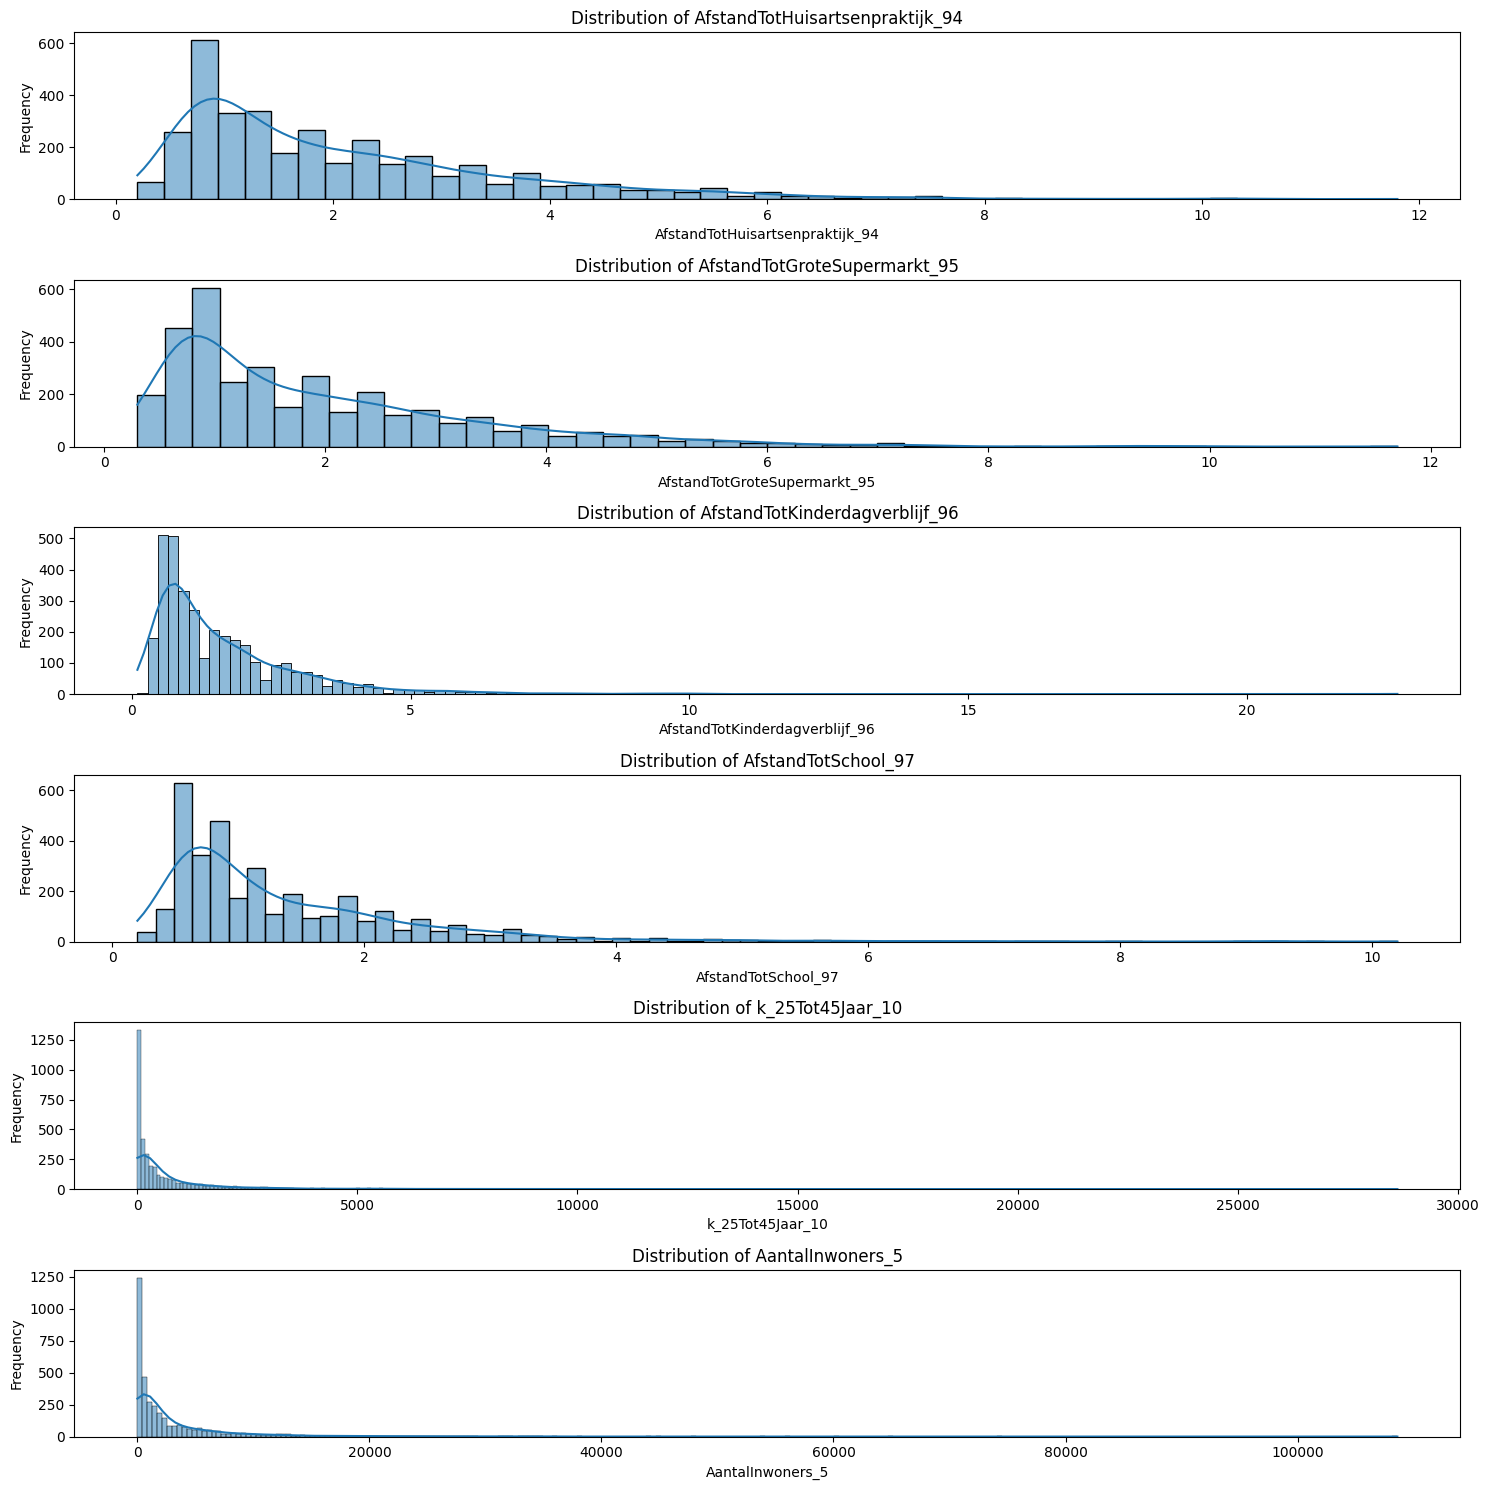

In [21]:
fig, axes = plt.subplots(6,1, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(df_merged[["AfstandTotHuisartsenpraktijk_94", "AfstandTotGroteSupermarkt_95", "AfstandTotKinderdagverblijf_96",
                    "AfstandTotSchool_97", "k_25Tot45Jaar_10", "AantalInwoners_5"]]): 
    sns.histplot(df_merged[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Selectie Variabelen

In dit deel selecteer/ontwikkel ik de scores die verschillende beoordelingscriteria zullen representeren. Ik gebruik een MinMaxScaler om de scores in een 0-1 range te krijgen. Ik gebruik geen z-score normalisatie omdat geen van de kolommen normaal verdeeld is.

In [22]:
facility_columns = ["AfstandTotHuisartsenpraktijk_94", "AfstandTotGroteSupermarkt_95", "AfstandTotKinderdagverblijf_96",
                    "AfstandTotSchool_97"]

Deze faciliteiten variabelen zijn belangrijk in onze analyse en kunnen daarom niet NaN zijn, ik gebruik geen imputation omdat er geen indicatie is dat deze variabelen betrouwbaar afgeleid kunnen worden van andere variabelen (en omdat ze te belangrijk zijn om means/medians in te imputen). Ze correleren uiteraard wel zwak negatief met variabelen zoals bevolkingsdichtheid (~-0.35).

In [23]:
df_merged[facility_columns].isna().sum()

AfstandTotHuisartsenpraktijk_94    151
AfstandTotGroteSupermarkt_95       151
AfstandTotKinderdagverblijf_96     151
AfstandTotSchool_97                170
dtype: int64

In [24]:
df_merged = df_merged.dropna(subset=facility_columns)

In [25]:
scaler = MinMaxScaler()
normalized_values = 1 - scaler.fit_transform(df_merged[facility_columns])

df_merged['facility_score'] = normalized_values.mean(axis=1)

Als variabele die toegang tot natuur representeert zou ik ook iets als bevolkingsdichtheid kunnen gebruiken. Dit is echter een redelijk slechte representatie. Ik zou ook een variabele kunnen creëren door het totale oppervlakte land te delen door het aantal huizen, maar ook dit is niet de beste indicator voor natuur en zorgt er ook nog eens voor dat ik veel data weg moet gooien (veel NaN in huizen data).

### Ik heb er daarom voor gekozen om een externe dataset te gebruiken van, ook weer, het CBS (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/85217NED/table?ts=1746190523272) met veel informatie over de natuur per wijk/buurt.

Ik gebruik de variabelen: Totaal recreatieterrein, totaal bos en open natuurlijk terrein, totaal agrarisch terrein, en totaal buitenwater.

In [26]:
df_merged = pd.merge(
    df_merged,
    df3[['Totale oppervlakte (ha)',
         'Recreatieterrein/Totaal recreatieterrein (ha)',
         'Bos en open natuurlijk terrein/Totaal  bos en open natuurlijk terrein (ha)',
         'Agrarisch terrein/Totaal agrarisch terrein (ha)',
         'Buitenwater/Totaal buitenwater (ha)',
         'Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)',
         'Regioaanduiding/Soort regio (omschrijving)']],
    how='inner',
    left_on=['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2'],
    right_on=['Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)', 'Regioaanduiding/Soort regio (omschrijving)']
)

In [27]:
df_merged['nature_score'] = (
                                    df_merged['Recreatieterrein/Totaal recreatieterrein (ha)']
                                    + df_merged[
                                        'Bos en open natuurlijk terrein/Totaal  bos en open natuurlijk terrein (ha)']
                                    + df_merged['Agrarisch terrein/Totaal agrarisch terrein (ha)']
                                    + df_merged['Buitenwater/Totaal buitenwater (ha)']
                            ) / df_merged['Totale oppervlakte (ha)']

scaler = MinMaxScaler()
df_merged['nature_score'] = scaler.fit_transform(df_merged[['nature_score']])

In [28]:
df_merged.sort_values(by='nature_score', ascending=False)[['WijkenEnBuurten', 'Gemeentenaam_1', 'nature_score']] # ziet er logisch uit

,WijkenEnBuurten,Gemeentenaam_1,nature_score
920,Gortel,Epe,1.000000
2646,Pijnenburg,Soest,1.000000
2415,Wodanswoud,Renkum,1.000000
2807,Wijk 05 Oosterend,Terschelling,0.994892
2478,Buurtschap Holterberg,Rijssen-Holten,0.992590
...,...,...,...
2996,Veendam-industriegebied,Veendam,0.038093
2925,Wijk 01 West,Utrecht,0.030619
2926,Bedrijventerrein Lageweide,Utrecht,0.019785
115,Westelijk Havengebied,Amsterdam,0.012161


Nu voor een score die betaalbaarheid representeert, gebaseerd op de gemiddelde verkoopprijs per gemeente. Omdat het per gemeente is, is het helaas niet helemaal nauwkeurig.

i.p.v. de gemiddelde verkoopprijs gebruikne, zou ik ook de gemiddelde WOZ-waarde kunnen gebruiken, deze correleren sterk met elkaar.

In [29]:
df_merged = df_merged.dropna(subset='GemiddeldeVerkoopprijs_1') # drop alle rijen waar er geen verkoopdata voor is

In [30]:
scaler = MinMaxScaler()
df_merged['price_score'] = 1 - scaler.fit_transform(df_merged[['GemiddeldeVerkoopprijs_1']])

Helaas is er alleen maar de categorie 25-45 jaar om onze starters te representeren i.p.v. 25-35. Dit is niet ideaal maar het is een redelijke indicatie om buurten te vinden die in ieder geval niet puur grijs zijn.

In [31]:
df_merged['starter_score'] = df_merged['k_25Tot45Jaar_10'] / df_merged['AantalInwoners_5']
scaler = MinMaxScaler()
df_merged['starter_score'] = scaler.fit_transform(df_merged[['starter_score']])

Noemenswaardige variabelen die ik niet meeneem in de analyse:
- sterfte en geboorte variabelen: kunnen mogelijk gebruikt worden om bevolkingsgroei te representeren. Bevolkingsgroei kan een indicatie zijn van woningvraag. Dit effect is echter enorm vertraagd. Omdat we geen historische data hebben neem ik dit voor nu niet mee.
- woningtype variabelen: Het gebruiken van deze variabelen zorgt er voor dat ~half de data moet worden weggegooid omdat het zo veel NaN waardes bevat (het is mogelijk dat NaN hier 0 woningen van een specifiek type representeert maar dit is niet duidelijk).

# Multi-Criteria Decision Analysis (MCDA)

Uiteindelijk hebben we dus 4 criteria:
- betaalbaarheid (inverse genormaliseerde verkoopprijs in de gemeente)
- toegang tot natuur (genormaliseerd percentage van natuur in de wijk/buurt)
- toegang tot faciliteiten (inverse genormaliseerde afstand tot verschillende voorzieningen)
- aantrekkelijk voor starters (huidige genormaliseerd percentage inwoners tussen de 25 en 45)

Omdat we niet expliciet een variabele voor woningvraag hebben gemodelleerd kijken we alleen maar naar gemeenten binnen de randstad, waar de woningvraag vaak hoger is dan daarbuiten.


In [32]:
def bar_plot(facility_weight, nature_weight, price_weight, starter_weight, df, n, only_randstad):
    # randstad volgens wikipedia
    randstad_gemeenten = [
        'Amsterdam', 'Rotterdam', "'s-Hertogenbosch", 'Utrecht', 'Almere', 'Haarlem',
        'Haarlemmermeer', 'Amersfoort', 'Zaanstad', 'Leiden', 'Zoetermeer', 'Dordrecht',
        'Westland', 'Alphen aan den Rijn', 'Alkmaar', 'Delft','Gorinchem', 'Ridderkerk', 'Capelle aan den IJssel', 'Schiedam', 'Spijkenisse', 'Hellevoetsluis', 'Vlaardingen', 'Katwijk', 'Hoofddorp', 'Zandvoort', 'IJmuiden', 'Beverwijk', 'Zaandam', 'Amstelveen', 'Hilversum', 'Zeist', 'Houten', 'Nieuwegein']
    
    
    df = df.copy()
    if only_randstad:
        df = df[df['Gemeentenaam_1'].isin(randstad_gemeenten)]

    df['facility_contrib'] = df['facility_score'] * facility_weight
    df['nature_contrib'] = df['nature_score'] * nature_weight
    df['price_contrib'] = df['price_score'] * price_weight
    df['starter_contrib'] = df['starter_score'] * starter_weight

    df['total_score'] = (
        df['facility_contrib'] +
        df['nature_contrib'] +
        df['price_contrib'] +
        df['starter_contrib']
    )

    top_n = df.sort_values(by='total_score', ascending=False).head(n)
    top_n['combined_label'] = top_n['Gemeentenaam_1'] + '\n' + top_n['WijkenEnBuurten']

    fig, ax = plt.subplots(figsize=(18, 5))
    bar1 = ax.bar(top_n['combined_label'], top_n['facility_contrib'], label='Facility Score', color='skyblue')
    bar2 = ax.bar(top_n['combined_label'], top_n['nature_contrib'], bottom=top_n['facility_contrib'], label='Nature Score', color='lightgreen')
    bar3 = ax.bar(top_n['combined_label'], top_n['price_contrib'], bottom=top_n['facility_contrib'] + top_n['nature_contrib'], label='Price Score', color='salmon')
    bar4 = ax.bar(top_n['combined_label'], top_n['starter_contrib'], 
           bottom=top_n['facility_contrib'] + top_n['nature_contrib'] + top_n['price_contrib'],
           label='Starter Score', color='plum')

    ax.set_xlabel('Buurt/Wijk')
    ax.set_ylabel('Samengestelde Score')
    ax.set_title(f'Top {n} buurten/wijken gebaseerd op de samengestelde score')

    descriptions = [
        Patch(color='skyblue', label='Faciliteiten Score: Beschikbaarheid van faciliteiten'),
        Patch(color='lightgreen', label='Natuur Score: Deel van het land als natuur'),
        Patch(color='salmon', label='Prijs Score: Betaalbaarheid van de woning'),
        Patch(color='plum', label='Starter Score: Deel van de bevolking rond dezelfde leeftijd'),
    ]
    ax.legend(handles=descriptions, title='Score Componenten', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

facility_weight_box = widgets.FloatText(value=1.0, description='Faciliteiten gewicht:', step=0.1)
nature_weight_box = widgets.FloatText(value=1.0, description='Natuur gewicht:', step=0.1)
price_weight_box = widgets.FloatText(value=1.0, description='Prijs gewicht:', step=0.1)
starter_weight_box = widgets.FloatText(value=1.0, description='Starter gewicht:', step=0.1)
n_box = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Top N:')
only_randstad_box = widgets.Checkbox(value=True, description='Alleen Randstad')

interactive_plot = interactive(
    bar_plot,
    facility_weight=facility_weight_box,
    nature_weight=nature_weight_box,
    price_weight=price_weight_box,
    starter_weight=starter_weight_box,
    df=widgets.fixed(df_merged),  
    n=n_box,
    only_randstad=only_randstad_box
)

In [33]:
display(interactive_plot) # interactieve versie van de plot, werkt waarschijnlijk alleen in jupyter lab

interactive(children=(FloatText(value=1.0, description='Faciliteiten gewicht:', step=0.1), FloatText(value=1.0…

Omdat de verschillende beoordelingscriteria verschillend kunnen worden gewogen verzamelen we een paar van de top resultaten:

# Beste plekken binnen de randstad (uniforme weging)


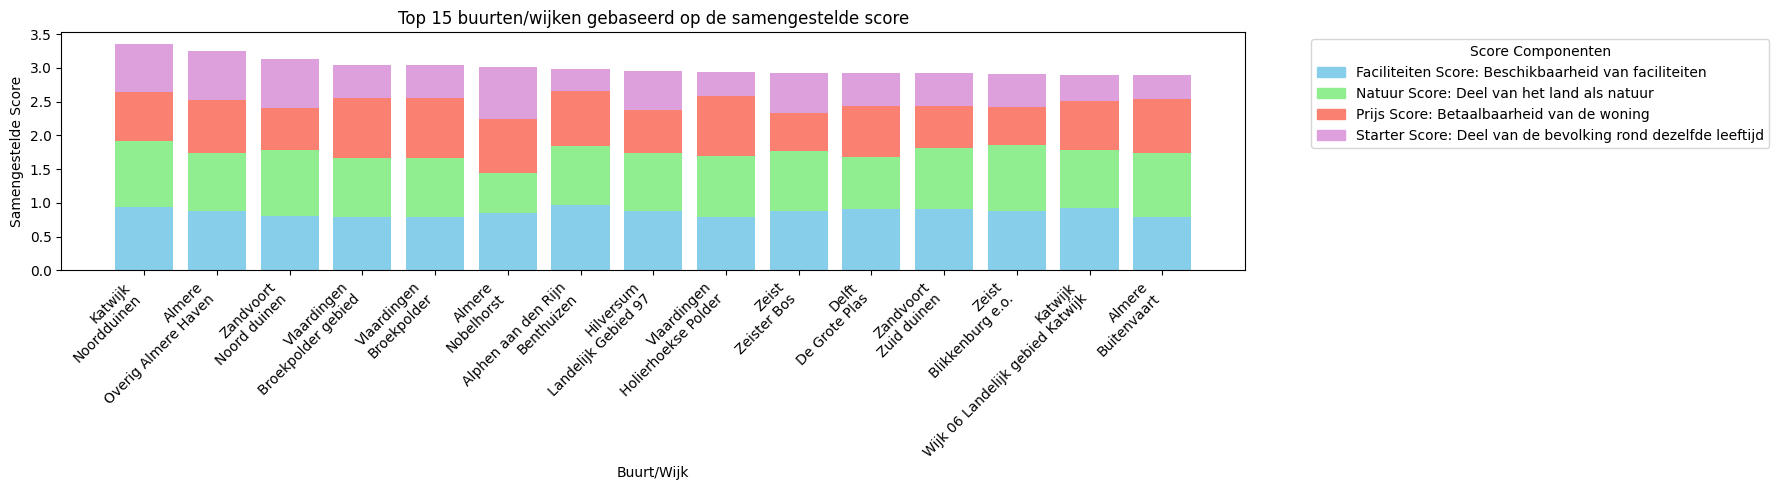

In [34]:
bar_plot(facility_weight = 1, nature_weight = 1, price_weight = 1, starter_weight = 1, df = df_merged, n = 15, only_randstad = True)

# Beste plekken binnen de randstad (betaalbaarheid prioriteit)

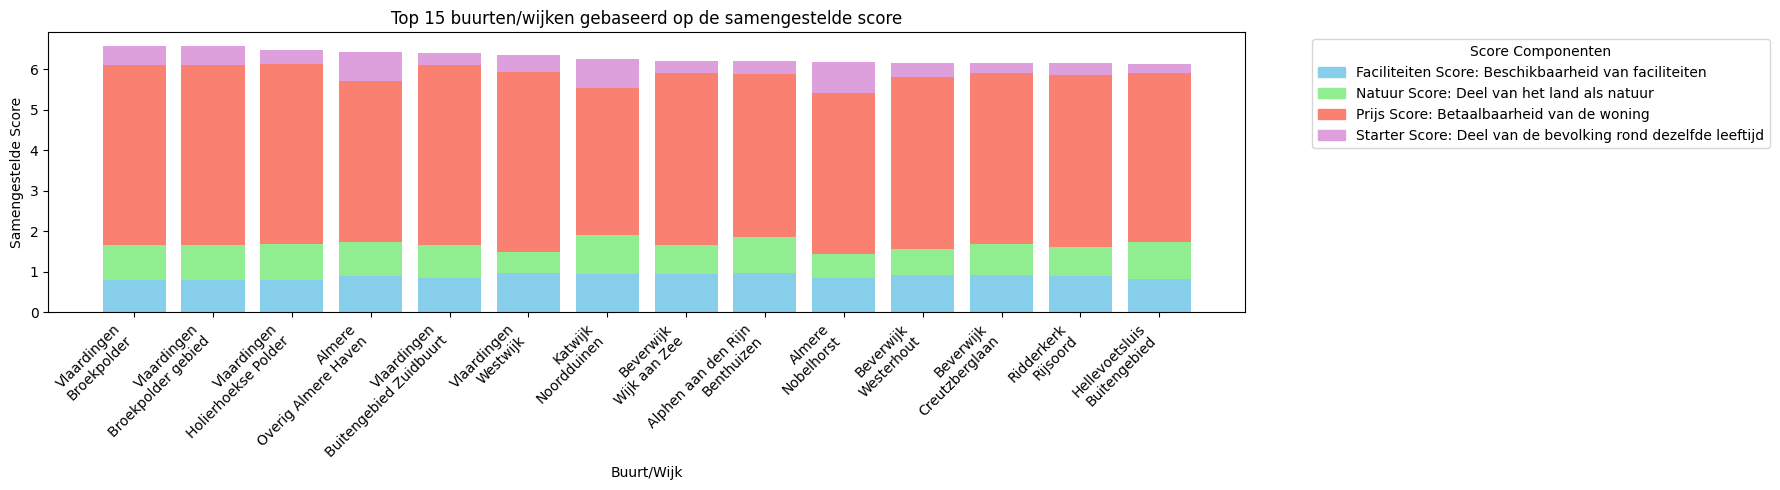

In [35]:
bar_plot(facility_weight = 1, nature_weight = 1, price_weight = 5, starter_weight = 1, df = df_merged, n = 15, only_randstad = True)

# Beste plekken in de randstad (gemixte prioriteit)
- starter score gewicht verlaagd omdat het vaak onbetrouwbaar is (inwonersaantal erg klein)
- natuur score gewicht verlaagd omdat je anders veel vakantieparken/buitengebieden krijgt

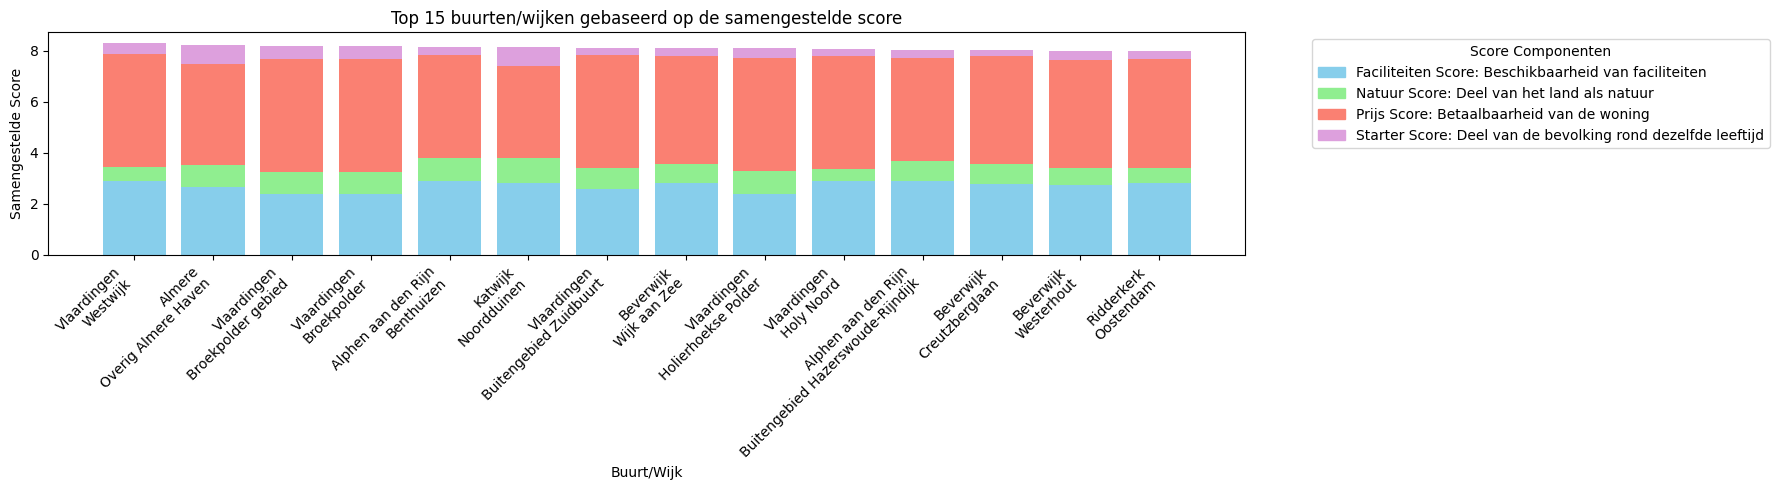

In [36]:
bar_plot(facility_weight = 3, nature_weight = 1, price_weight = 5, starter_weight = 1, df = df_merged, n = 15, only_randstad = True)

# Advies 1

Sommige van de wijken/buurten die goed scoren zijn vakantieparken/campings. Zonder deze zijn er een paar gemeenten meer meerdere wijken/buurten die goed scoren, de beste gemeenten volgens deze analyse zijn:

- Almere (Overig Almere Haven, Nobelhorst, Buitenvaart)
- Vlaardingen (Westwijk, Broekpolder, Holy Noord, etc.)
- Alphen aan den Rijn (Benthuizen, Hazerswoude-Rijndijk)
- Beverwijk (Wijk aan Zee, Creutzberglaan, Westerhout)

Voor verschillende criteria lijken deze de beste opties:

- Beste algemene optie (maar er wonen veel oudere mensen): Benthuizen, Alphen aan den Rijn
- Voor een betaalbare optie (voor de koper) met goede toegang tot natuur: Broekpolder, Vlaardingen
- Voor een buurt met relatief jonge inwoners en goed bereikbare faciliteiten: Nobelhorst, Almere

Om een definitief besluit te maken zou ik echter eerst meer data verzamelen en tenminste woningvraag modelleren.

In [37]:
df_merged[(df_merged['WijkenEnBuurten'].isin(['Overig Almere Haven', 'Nobelhorst', 'Buitenvaart', 'Westwijk', 'Broekpolder', 'Holy Noord', 'Benthuizen', 'Buitengebied Hazerswoude-Rijndijk','Wijk aan Zee', 'Creutzberglaan', 'Westerhout']))][['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2','AantalInwoners_5','nature_score', 'facility_score', 'starter_score', 'price_score','GemiddeldeVerkoopprijs_1', 'BouwgrondOpp']]

,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,AantalInwoners_5,nature_score,facility_score,starter_score,price_score,GemiddeldeVerkoopprijs_1,BouwgrondOpp
60,Overig Almere Haven,Almere,Buurt,10,0.845133,0.887897,0.722222,0.794275,294284.0,300
72,Buitenvaart,Almere,Buurt,220,0.946637,0.794983,0.361111,0.794275,294284.0,64
78,Nobelhorst,Almere,Buurt,585,0.589055,0.858340,0.765432,0.794275,294284.0,54
80,Benthuizen,Alphen aan den Rijn,Wijk,3540,0.882128,0.968508,0.330508,0.805782,286500.0,200
83,Buitengebied Hazerswoude-Rijndijk,Alphen aan den Rijn,Buurt,1505,0.800013,0.963759,0.321521,0.805782,286500.0,22
389,Westerhout,Beverwijk,Buurt,20,0.664438,0.911972,0.361111,0.846576,258905.0,8
391,Creutzberglaan,Beverwijk,Buurt,700,0.750130,0.931046,0.247619,0.846576,258905.0,26
392,Wijk aan Zee,Beverwijk,Wijk,2150,0.398077,0.938143,0.309044,0.846576,258905.0,168
393,Wijk aan Zee,Beverwijk,Buurt,2150,0.732239,0.938143,0.309044,0.846576,258905.0,100
3113,Westwijk,Vlaardingen,Wijk,12615,0.519959,0.971827,0.431101,0.887214,231415.0,28


# Deel 2

Omdat we niet de prijs van de grond per huis hebben en omdat we alleen de gemiddelde verkoopprijs per gemeente hebben, zullen we nooit een hele nauwkeurige berekening krijgen. Om het wat realistischer te maken nemen we kavel prijzen over van https://www.itx-bouwconsult.nl/informatie/kavelprijzen, we gebruiken de hoogste inschatting van 555 euro per m2, met een kavel van 100m2 (als we woningen bouwen van 120m2 met twee verdiepingen lijkt dat reëel).

In [38]:
nr_of_cheap_houses = np.floor(15000000 / ((120*1200) + (100*555))) # hogere inschatting aantal woningen
nr_of_cheap_houses

75.0

In [39]:
nr_of_expensive_houses = np.floor(15000000 / ((120*1800) + (100*555))) # lagere inschatting aantal woningen
nr_of_expensive_houses

55.0

In [40]:
df_candidates = df_merged[(df_merged['WijkenEnBuurten'].isin(['Benthuizen', 'Broekpolder', 'Nobelhorst']))][['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2','AantalInwoners_5','GemiddeldeVerkoopprijs_1', 'BouwgrondOpp', 'GemiddeldeDoorlooptijd_12']]

In [41]:
df_candidates['per_house_cost_low'] = [(120*1200) + (100*555) for _ in range(3)]
df_candidates['per_house_cost_high'] = [(120*1800) + (100*555) for _ in range(3)]

In [42]:
df_candidates['profit_per_house_cost_low'] = df_candidates['GemiddeldeVerkoopprijs_1'] - df_candidates['per_house_cost_low']
df_candidates['profit_per_house_cost_high'] = df_candidates['GemiddeldeVerkoopprijs_1'] - df_candidates['per_house_cost_high']

In [43]:
df_candidates['gross_profit_low_cost_houses'] = df_candidates['profit_per_house_cost_low'] * nr_of_cheap_houses
df_candidates['gross_profit_high_cost_houses'] = df_candidates['profit_per_house_cost_high'] * nr_of_expensive_houses

In [44]:
df_candidates[['WijkenEnBuurten', 'Gemeentenaam_1','gross_profit_high_cost_houses','gross_profit_low_cost_houses', 'BouwgrondOpp', 'GemiddeldeDoorlooptijd_12']]

,WijkenEnBuurten,Gemeentenaam_1,gross_profit_high_cost_houses,gross_profit_low_cost_houses,BouwgrondOpp,GemiddeldeDoorlooptijd_12
78,Nobelhorst,Almere,1253120.0,7108800.0,54,21.0
80,Benthuizen,Alphen aan den Rijn,825000.0,6525000.0,200,28.0
3119,Broekpolder,Vlaardingen,-2204675.0,2393625.0,155,21.0


# Advies 2

Met de gegeven ingeschatte kost per huis per kavel is het mogelijk om maximaal 75 nieuwe woningen te bouwen (met goedkoop gebouwde woningen), minstens 55 (met duur gebouwde woningen).

De ingeschatte winst verschilt per wijk/buurt:

- Nobelhorst: €1.253.120 tot €7.108.800
- Benthuizen: €825.000 tot €6.525.000
- Broekpolder: €-2.204.675 tot €2.393.625

Meteen duidelijk is dat alleen broekpolder niet rendabel is met het duurste type huizen. Alle huistypes zijn rendabel in de anderen wijken/buurten (gebaseerd op onze zeer simpele inschatting).

### Nobelhorst
Voordelen:

- Meest rendabel
- Veel andere mensen in de 25-45 categorie in de buurt
- Gemiddelde doorlooptijd van 21 maanden

Nadelen:
- Verkoopprijs mogelijk te hoog voor veel starters (27% duurder dan Broekpolder gebaseerd op de gemiddelde verkoopprijs gemeente)
- Significant minder groen dan de andere twee opties

### Benthuizen
Voordelen:

- Zeer rendabel
- De optie met de meeste natuur in de buurt
- De optie met de dichtstbijzijnde faciliteiten

Nadelen:
- Verkoopprijs mogelijk te hoog voor veel starters (24% duurder dan Broekpolder gebaseerd op de gemiddelde verkoopprijs gemeente)
- Bovengemiddelde doorlooptijd van 28 maanden
- Weinig mensen in de 25-45 categorie in de buurt

### Broekpolder
Voordelen:
- De goedkoopste optie voor starters
- Gemiddelde doorlooptijd van 21 maanden


Nadelen:
- Het minst rendabel, niet rendabel met duur gebouwde woningen
- Maar 15 huidige inwoners

# Beste optie 🏆
Hoewel alle drie de geselecteerde wijken of buurten sterke eigenschappen bezitten en in specifieke scenario’s als beste keuze naar voren kunnen komen, valt Benthuizen af in de uiteindelijke selectie. De voornaamste reden hiervoor is de relatief lange gemiddelde doorlooptijd van 28 maanden, wat haaks staat op de doelstelling uit de casus om starters zo snel mogelijk van een woning te voorzien.

Broekpolder brengt daarentegen meer onzekerheid met zich mee. In onze versimpelde rendementsanalyse blijkt deze locatie al aanzienlijk minder winstgevend dan de andere twee opties. Wanneer er rekening wordt gehouden met onverwachte kosten of een completer overzicht van investeringsfactoren, bestaat het risico dat het project in deze wijk niet langer rendabel is, zelfs niet bij kostenbesparingen tijdens de bouw.

Op basis van de analyse in combinatie met de casusdoelstellingen lijkt Nobelhorst in Almere de meest geschikte keuze. De hogere woningprijs zou de verkoopsnelheid enigszins kunnen vertragen, maar het feit dat er veel mensen in leeftijdscategorie 25–45 jaar wonen, gecombineerd met een significant grotere hoeveelheid koopwoningen ten opzichte van huurwoningen, duidt erop dat woningen in deze buurt ondanks de hogere prijs toch betaalbaar en aantrekkelijk zijn voor de beoogde doelgroep van starters. Dit lijkt ook in de praktijk te kloppen (https://nobelhorst.nl/toekomstig-aanbod/).